In [1]:
from pathlib import Path
from book_loader import BookLoader
import pandas as pd
import matplotlib.pyplot as plt
import re
import json
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop

In [2]:
with open('parameters.json', 'r', encoding="utf-8") as json_file:
    params = json.load(json_file)

book = BookLoader(**params)

observed_lengths = [len(c) for c in book.chapters]
expected_lengths = [43, 101, 152, 136, 271, 307, 23]

chapters: list[list[str]] = book.chapters

In [3]:
df = pd.DataFrame(data={"chapters": range(len(chapters))})

def count_words(i):
    return sum(map(lambda p: len(p.split()), chapters[i]))

df["words"] = df["chapters"].apply(count_words)
                      

def count_unique_words(i):
    return len(set('\n'.join(chapters[i]).split()))

df["unique_words"] = df["chapters"].apply(count_unique_words)


def count_stop_words(p):
    return sum(1 for w in p.split() if w in fr_stop)

df["stop_words"] = df["chapters"].apply(
    lambda i: sum(map(count_stop_words, chapters[i])))


# def count_bisections(p):
#     return len(bisection_pat.findall(p))

# bisection_pat = re.compile(r"([A-Za-z]+)-\s([A-Za-z]+)")
# df["bisected_words"] = df["chapters"].apply(
#     lambda i: sum(map(count_bisections, chapters[i])))


df.style.hide(axis='index')

chapters,words,unique_words,stop_words
0,4611,1733,2105
1,7270,2339,3335
2,10104,2987,4518
3,10565,3233,4798
4,13234,4055,6168
5,14365,3947,6530
6,1641,744,783


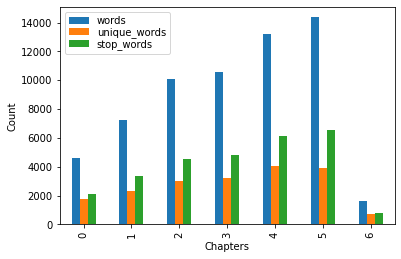

In [4]:
bar_plot = df.iloc[:, 1:].plot.bar(xlabel="Chapters", ylabel="Count")
plt.legend(loc='best', labelspacing=0.1)
fig = plt.gcf()

In [5]:
fig.savefig("stats.jpg")